# Connect Drive & Import Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28643 sha256=2be616d4b075c3df80fc937da5c94fbf4a94aaa76c74fa711face1947831ab59
  Stored in directory: /root/.cache/pip/wheels/df/33/51/592213372072da189a4ff8f471838cadcc91add5821f7b9b38
Successfully built yahoofinancials


In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=fdf604fce451aae8bd45d47a54af1eee8528ffe06842735d7ee1af83b671eec5
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.8 MB/s eta 0:00:00


In [ ]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mpl
import plotly.graph_objs as go

import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
import warnings

warnings.filterwarnings('ignore')


In [ ]:
startdate = datetime.datetime(2014, 9, 18)
enddate = datetime.datetime(2023, 3, 25)

ticker = "^GSPC"
SP500 = yf.download(ticker, startdate, enddate)
print(SP500.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-18  2003.069946  2012.339966  2003.069946  2011.359985  2011.359985   
2014-09-19  2012.739990  2019.260010  2006.589966  2010.400024  2010.400024   
2014-09-22  2009.079956  2009.079956  1991.010010  1994.290039  1994.290039   
2014-09-23  1992.780029  1995.410034  1982.770020  1982.770020  1982.770020   
2014-09-24  1983.339966  1999.790039  1978.630005  1998.300049  1998.300049   

                Volume  
Date                    
2014-09-18  3235340000  
2014-09-19  4880220000  
2014-09-22  3349670000  
2014-09-23  3279350000  
2014-09-24  3313850000  


In [ ]:
ticker_btc = "BTC-USD"
df = yf.download(ticker_btc, startdate, enddate)
print(df.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   

              Volume  
Date                  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  
2014-09-22  24127600  


In [ ]:
ticker_Gold = "GLD"
Gold = yf.download(ticker_Gold, startdate, enddate)
print(Gold.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-20  184.190002  184.539993  182.740005  183.839996  183.839996   
2023-03-21  182.649994  182.729996  179.899994  180.369995  180.369995   
2023-03-22  180.399994  183.940002  180.279999  183.440002  183.440002   
2023-03-23  183.910004  186.240005  183.600006  185.740005  185.740005   
2023-03-24  185.610001  185.990005  183.619995  183.649994  183.649994   

              Volume  
Date                  
2023-03-20  11845700  
2023-03-21  10734500  
2023-03-22  11969600  
2023-03-23  11347100  
2023-03-24   9253100  


In [ ]:
df['SP500'] = SP500['Close']
df['Gold'] = Gold['Close']

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,SP500,Gold
Date,,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2011.359985,117.779999
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2010.400024,117.089996
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,1994.290039,116.849998


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP500', 'Gold'], dtype='object')

# Preprocessing

## Xử lý Missing value

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP500,Gold
count,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3.110000e+03,2144.000000,2144.000000
mean,13115.144388,13444.017096,12752.926061,13122.310180,13122.310180,1.661158e+10,2975.524338,138.338363
std,16053.277909,16463.370100,15582.256154,16050.270670,16050.270670,1.983119e+10,824.529118,25.009179
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,1829.079956,100.500000
25%,710.052765,718.838989,700.261505,711.546234,711.546234,1.109975e+08,2181.859924,117.632500
50%,7323.607910,7492.322510,7172.933594,7322.260254,7322.260254,8.825455e+09,2792.524902,125.764999
75%,18721.976074,19210.205566,18113.280273,18784.603516,18784.603516,2.816616e+10,3745.424988,165.350006
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,4796.560059,193.889999


In [ ]:
print('Số missing value trên từng thuộc tính của bộ dữ liệu:\n\n', df.isnull().sum())

Số missing value trên từng thuộc tính của bộ dữ liệu:

 Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
SP500        966
Gold         966
dtype: int64


In [ ]:
df['SP500'].fillna(method="ffill", inplace= True)
df['Gold'].fillna(method="ffill", inplace= True)

In [ ]:
print('Số missing value trên từng thuộc tính của bộ dữ liệu:\n\n', df.isnull().sum())

Số missing value trên từng thuộc tính của bộ dữ liệu:

 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SP500        0
Gold         0
dtype: int64


In [ ]:
print('Kiểu dữ liệu của từng thuộc tính trong bộ dữ liệu:\n', df.dtypes)

Kiểu dữ liệu của từng thuộc tính trong bộ dữ liệu:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
SP500        float64
Gold         float64
dtype: object


In [ ]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((3110, 8), (3110, 8))

In [ ]:
df = df.drop(['Adj Close'], axis=1)

Thuộc tính Close và Adj Close là giống nhau, nên chúng ta sẽ loại bỏ cột Adj close


* Đổi kiểu dữ liệu object của cột ngày sang dạng datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3110 entries, 2014-09-18 to 2023-03-24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3110 non-null   float64
 1   High    3110 non-null   float64
 2   Low     3110 non-null   float64
 3   Close   3110 non-null   float64
 4   Volume  3110 non-null   int64  
 5   SP500   3110 non-null   float64
 6   Gold    3110 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 194.4 KB


## Trích chọn đặc trưng

In [ ]:
def SMA (df, periods=50):
    """
    Calculating the Simple Moving Average for the past n days
    """
    lst = []
    for i in range(len(df)):
        if i < periods:
            # Appending NaNs values
            lst.append(np.nan)
        else:
            # Calculate the SMA
            lst.append(round(np.mean(df[i:periods+i]), 2))
    return lst
def Stoch (closes, lows, highs, periods=14, d_periods=3):
    """
    Caclulating the Stochastic Oscillator for the past n days
    """
    k_lst = []
    d_lst = []
    for i in range(len(closes)):
        if i < periods:
            # Appending NaNs values
            k_lst.append(np.nan)
            d_lst.append(np.nan)
        else:
            # Caclulating the Stochastic Oscillator
            # Calculate the %K line
            highest = max(highs[i:periods+i])
            lowest = min(lows[i:periods+i])
            
            k = ((closes[i] - lowest)/ (highest - lowest))*100
            k_lst.append (round(k,2))
        # Calculate the %D line
            if len(k_lst) < d_periods:
                d_lst.append(np.nan)
            else:
                d_lst.append(round(np.mean(k_lst[-d_periods-1:-1])))
    return k_lst, d_lst
def RSI (df, periods =14):
    """
    Calculating the Relative Strength Index
    """
    df = df.diff()
    lst = []
    for i in range (len(df)):
        if i < periods:
            #Appending NaN values
            lst.append(np.nan)
        else:
            # Calculate the RSI
            avg_gain = (sum([x for x in df[i:periods + i] if x>= 0])/ periods)
            avg_loss = (sum([abs(x) for x in df[i:periods+i] if x<= 0])/ periods)

            rs = avg_gain/avg_loss
            rsi = 100 - (100/ (1+rs))
            lst.append(round(rsi, 2))
    return lst

In [ ]:
df['SMA5'] = SMA(df['Close'], periods=5)
df['SMA5']

Date
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
2014-09-22         NaN
                ...   
2023-03-20    27815.55
2023-03-21    27827.63
2023-03-22    27711.57
2023-03-23    27913.63
2023-03-24    27493.29
Name: SMA5, Length: 3110, dtype: float64

In [ ]:
import ta
df['RSI'] = ta.momentum.rsi(df.Close)

In [ ]:
df['Stoch_k'] = ta.momentum.stoch(df.High, df.Low, df.Close)
df['Stoch_d'] = ta.momentum.stoch_signal(df.High, df.Low, df.Close)

In [ ]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
SP500       0
Gold        0
SMA5        5
RSI        13
Stoch_k    13
Stoch_d    15
dtype: int64

In [ ]:
df.dropna(axis=0, inplace= True)
df.head()

,Open,High,Low,Close,Volume,SP500,Gold,SMA5,RSI,Stoch_k,Stoch_d
Date,,,,,,,,,,,
2014-10-03,375.181000,377.695007,357.859009,359.511993,30901200,1967.900024,114.610001,335.03,29.142997,1.974939,6.500989
2014-10-04,359.891998,364.487000,325.885986,328.865997,47236500,1967.900024,114.610001,333.72,22.420673,2.576281,2.878933
2014-10-05,328.915985,341.800995,289.295990,320.510010,83308096,1967.900024,114.610001,340.95,20.998409,20.500336,8.350519
2014-10-06,320.389008,345.134003,302.559998,330.079010,79011800,1964.819946,116.029999,349.16,26.730442,26.784939,16.620519
2014-10-07,330.584015,339.247009,320.481995,336.187012,49199900,1935.099976,116.360001,355.60,30.211216,31.938630,26.407968


# Exploratory Data Analysis (EDA)

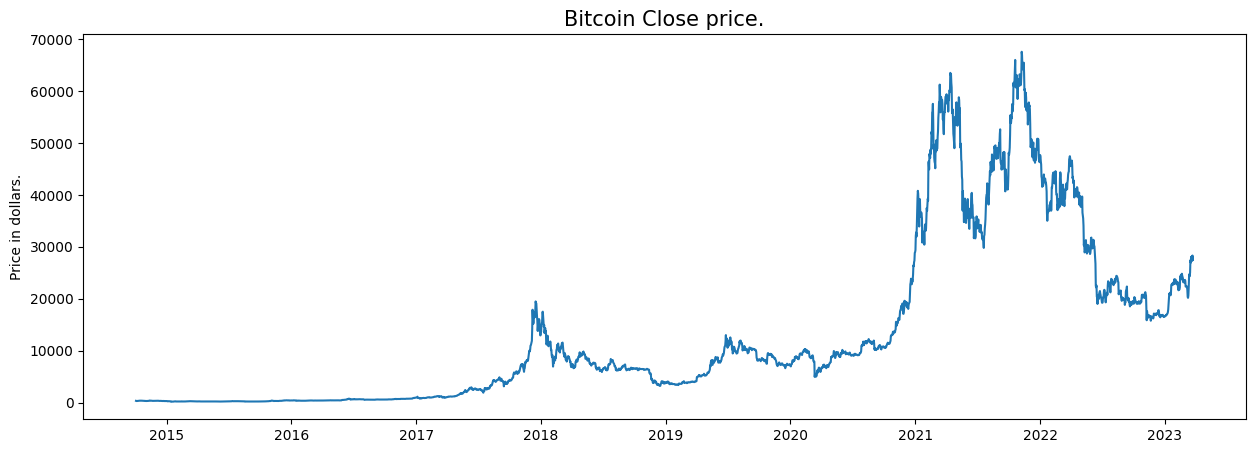

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

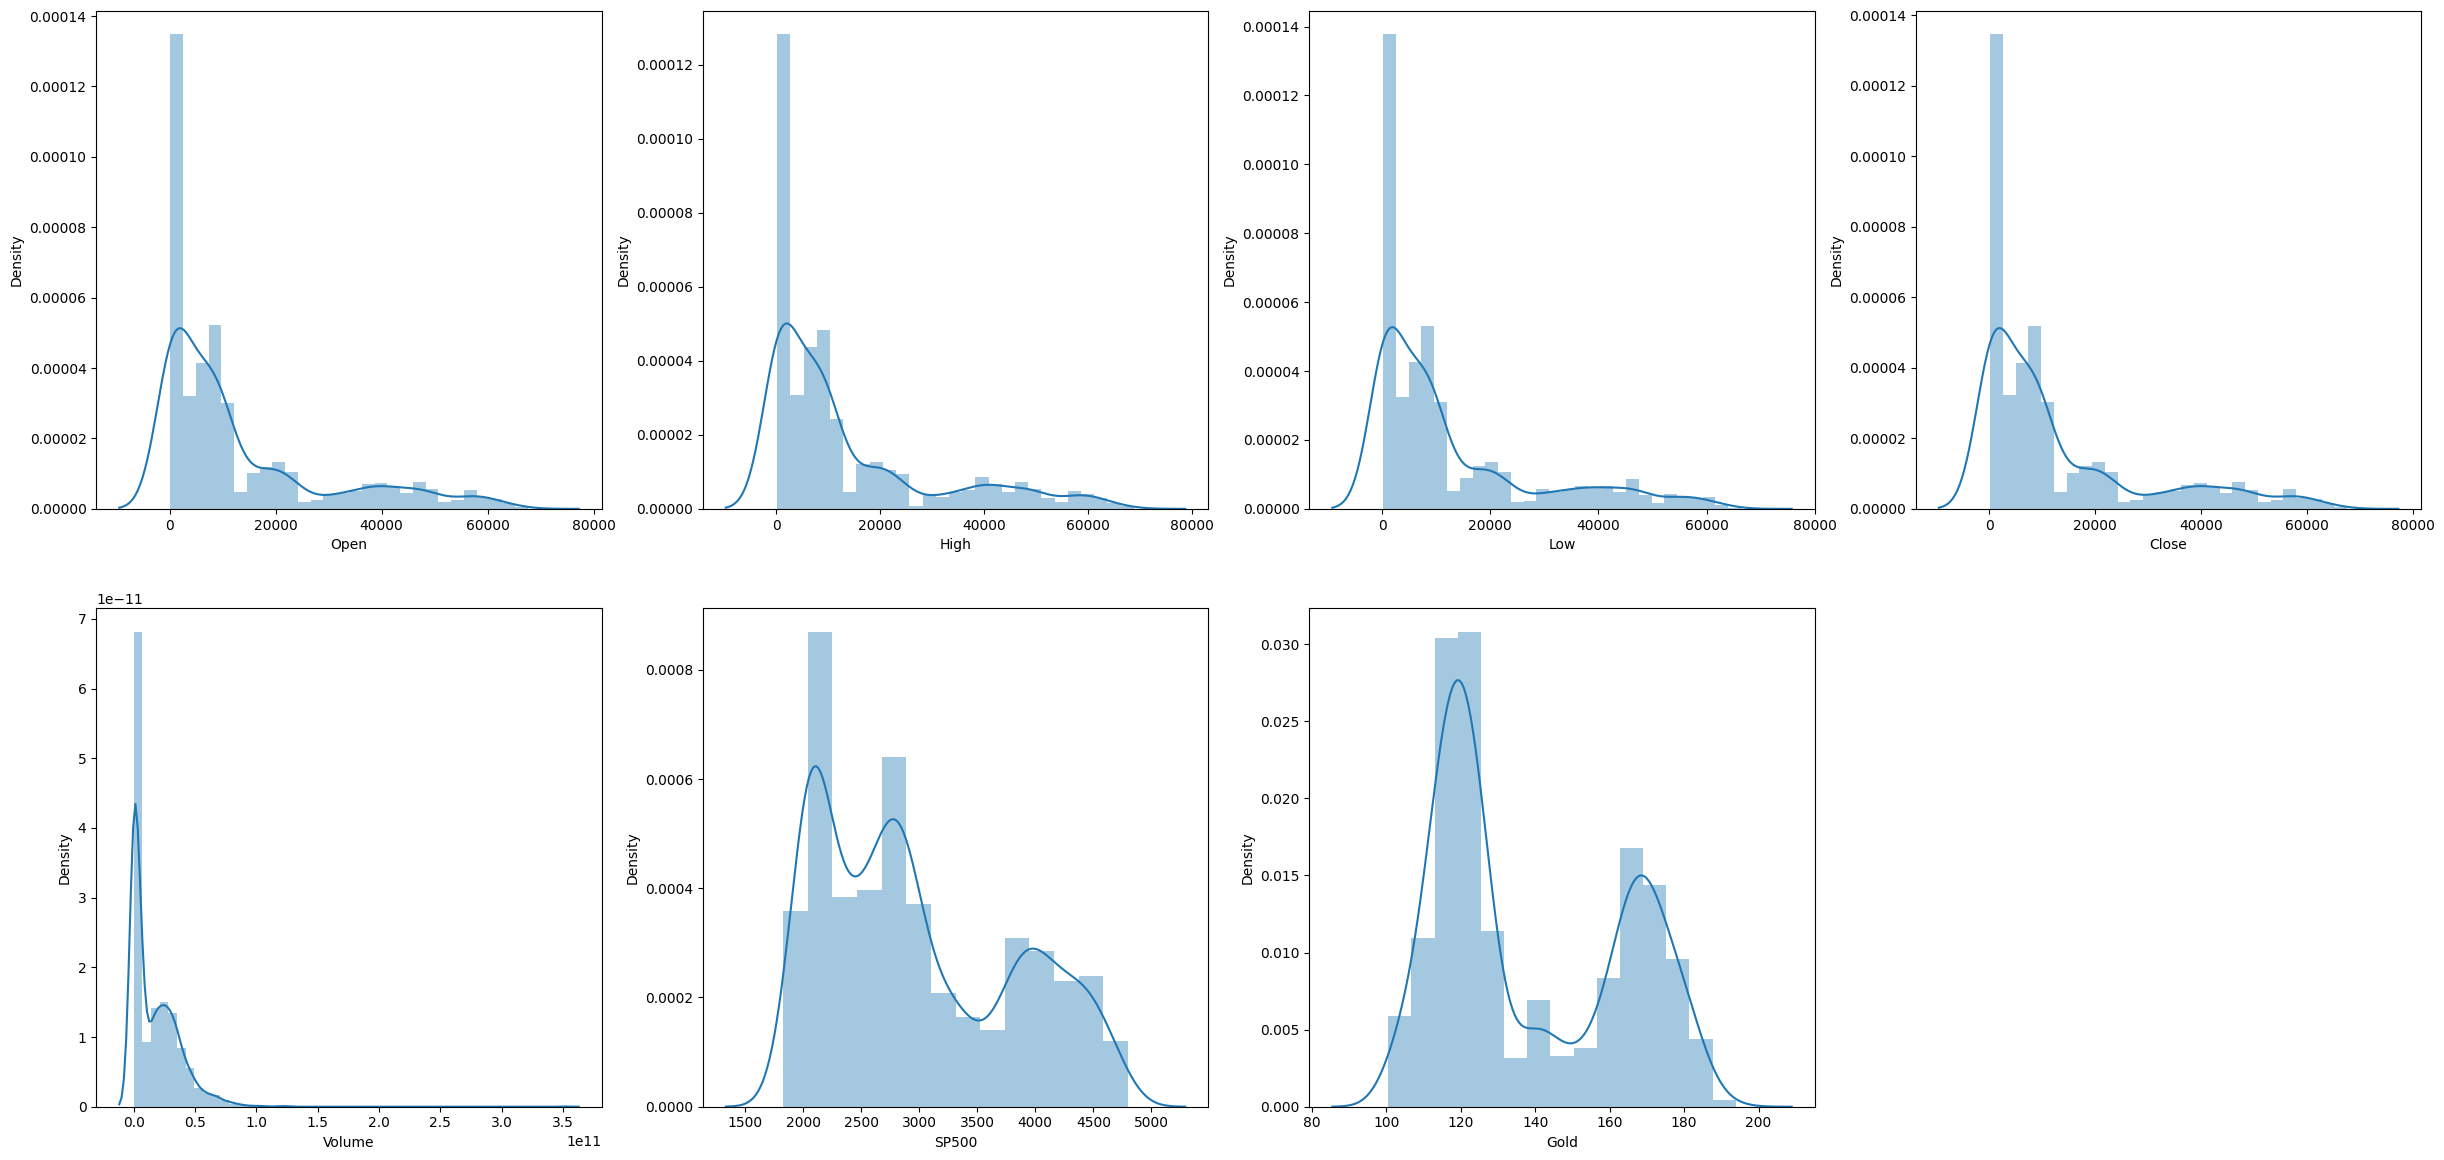

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SP500', 'Gold']
 
plt.subplots(figsize=(30,22))
for i, col in enumerate(features):
  plt.subplot(3,4,i+1)
  sb.distplot(df[col])
plt.show()

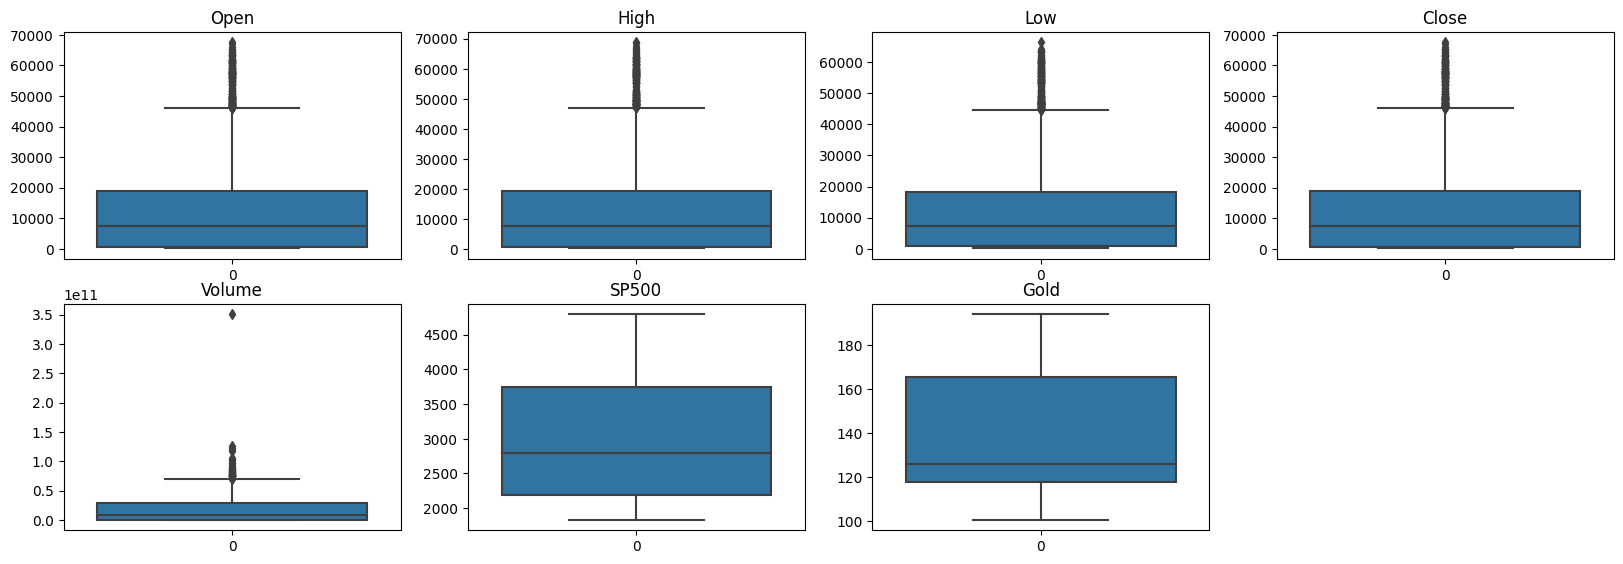

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(3,4,i+1)
  plt.title(col)
  sb.boxplot(df[col])
plt.show()

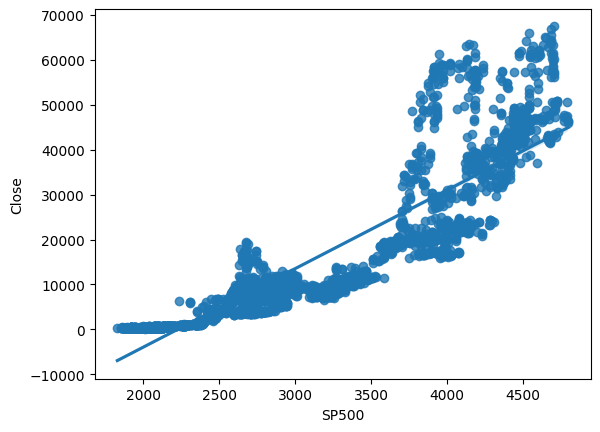

In [ ]:
sb.regplot(x="SP500", y="Close", data=df)
plt.show()

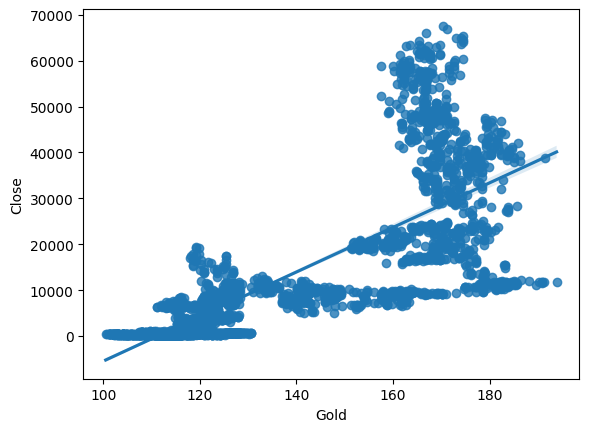

In [ ]:
sb.regplot(x="Gold", y="Close", data=df)
plt.show()

<Axes: >

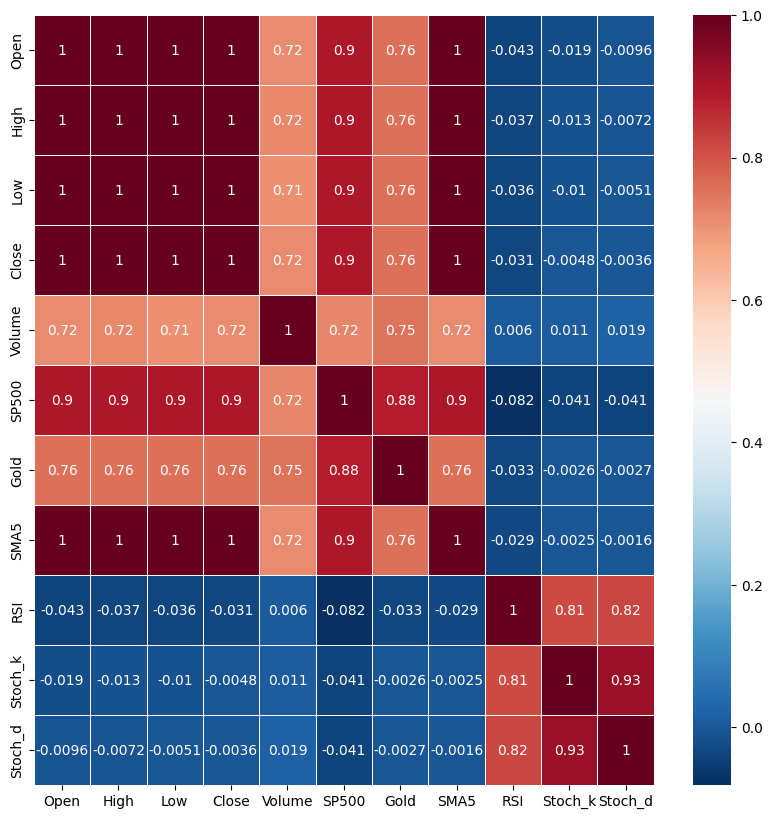

In [ ]:
plt.figure(figsize=(10, 10))
pearsoncorr = df.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

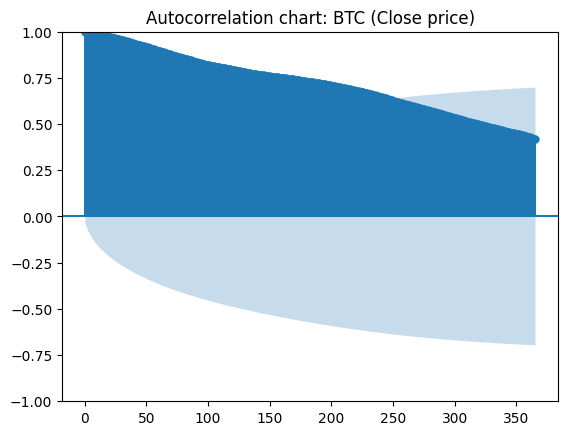

In [ ]:
plot_acf(df["Close"],lags=365,title="Autocorrelation chart: BTC (Close price)")
plt.show()

Decomposing closing price of BTC over time


<Figure size 3500x1700 with 0 Axes>

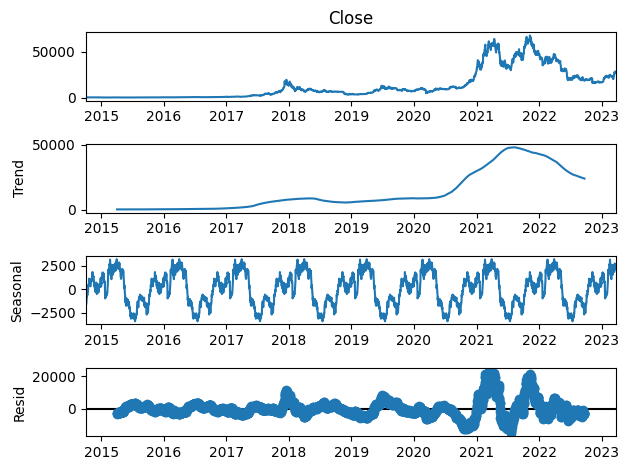

In [ ]:
import statsmodels.api as sm
print("Decomposing closing price of BTC over time")

plt.figure(figsize=(35, 17))
decomposed_btc_close = sm.tsa.seasonal_decompose(df["Close"],period=365) # The frequncy is annual
figure = decomposed_btc_close.plot()

plt.show()

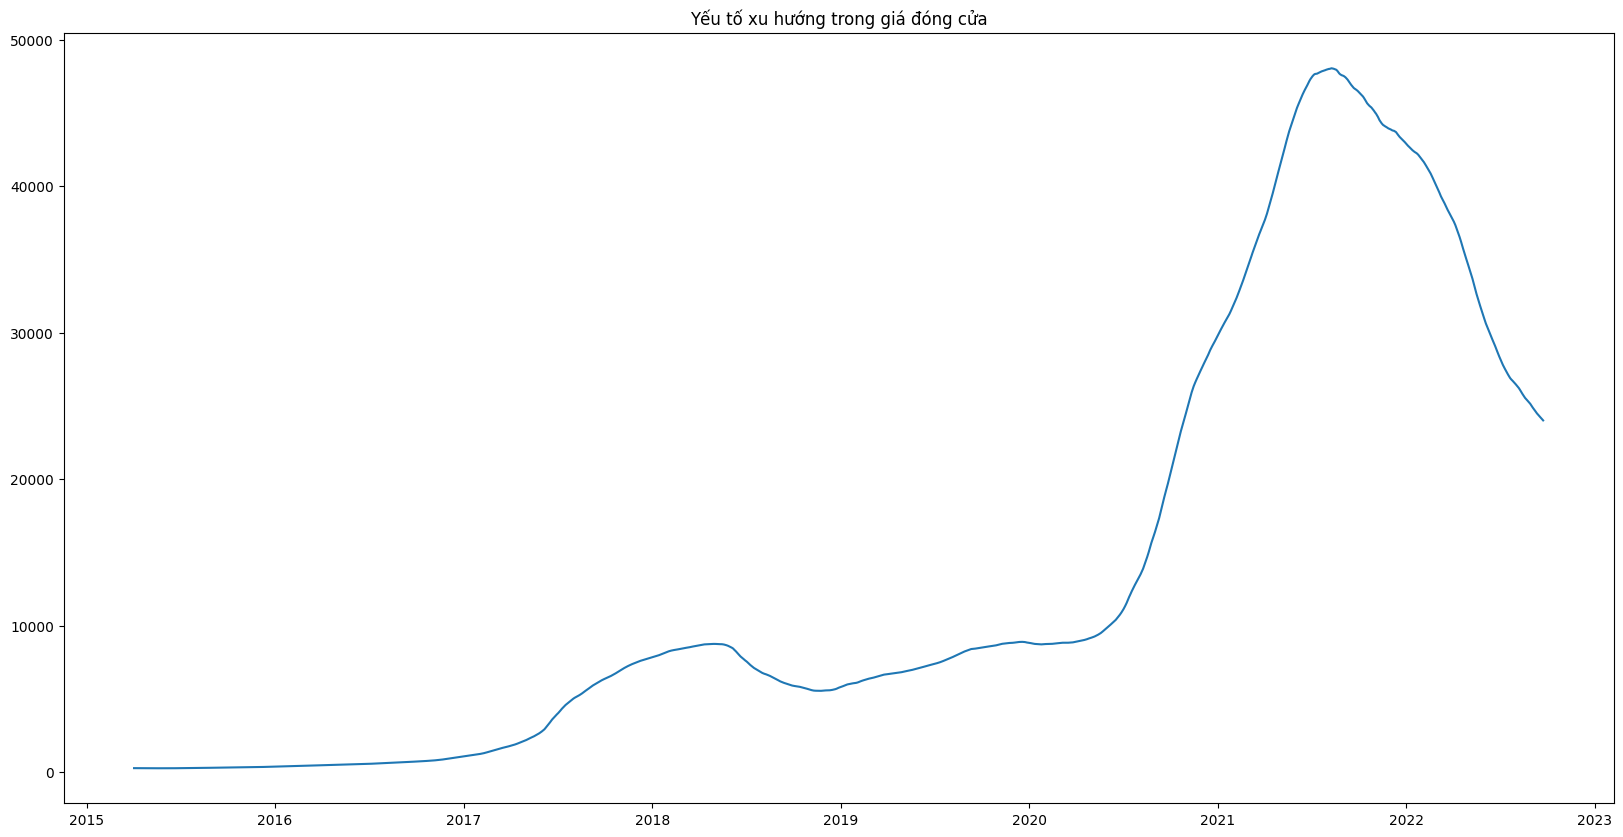

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Yếu tố xu hướng trong giá đóng cửa")
plt.plot(decomposed_btc_close.trend)

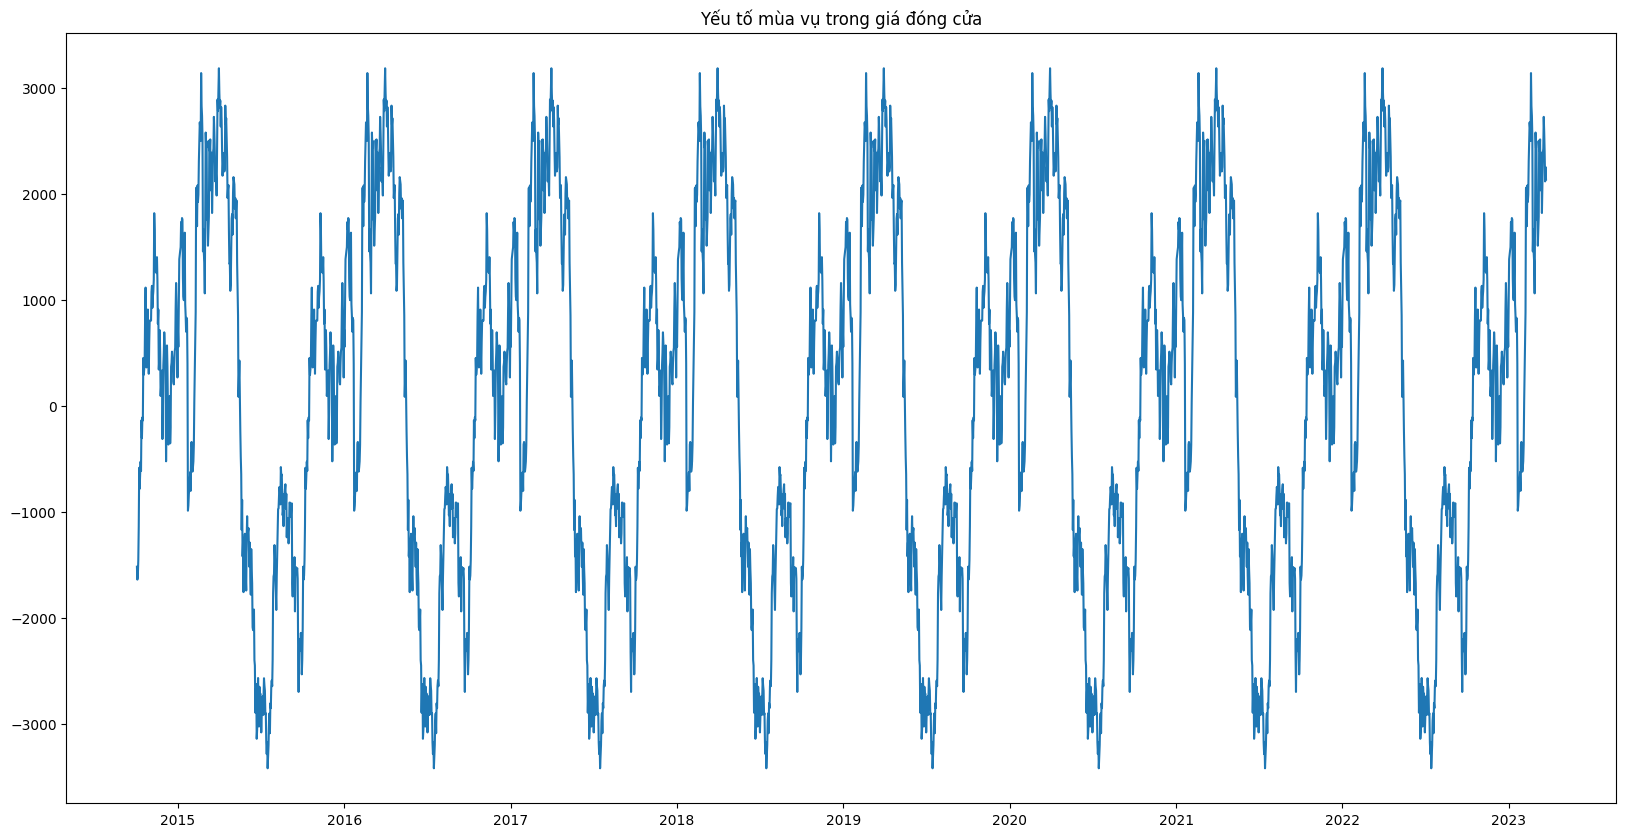

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Yếu tố mùa vụ trong giá đóng cửa")
plt.plot(decomposed_btc_close.seasonal)

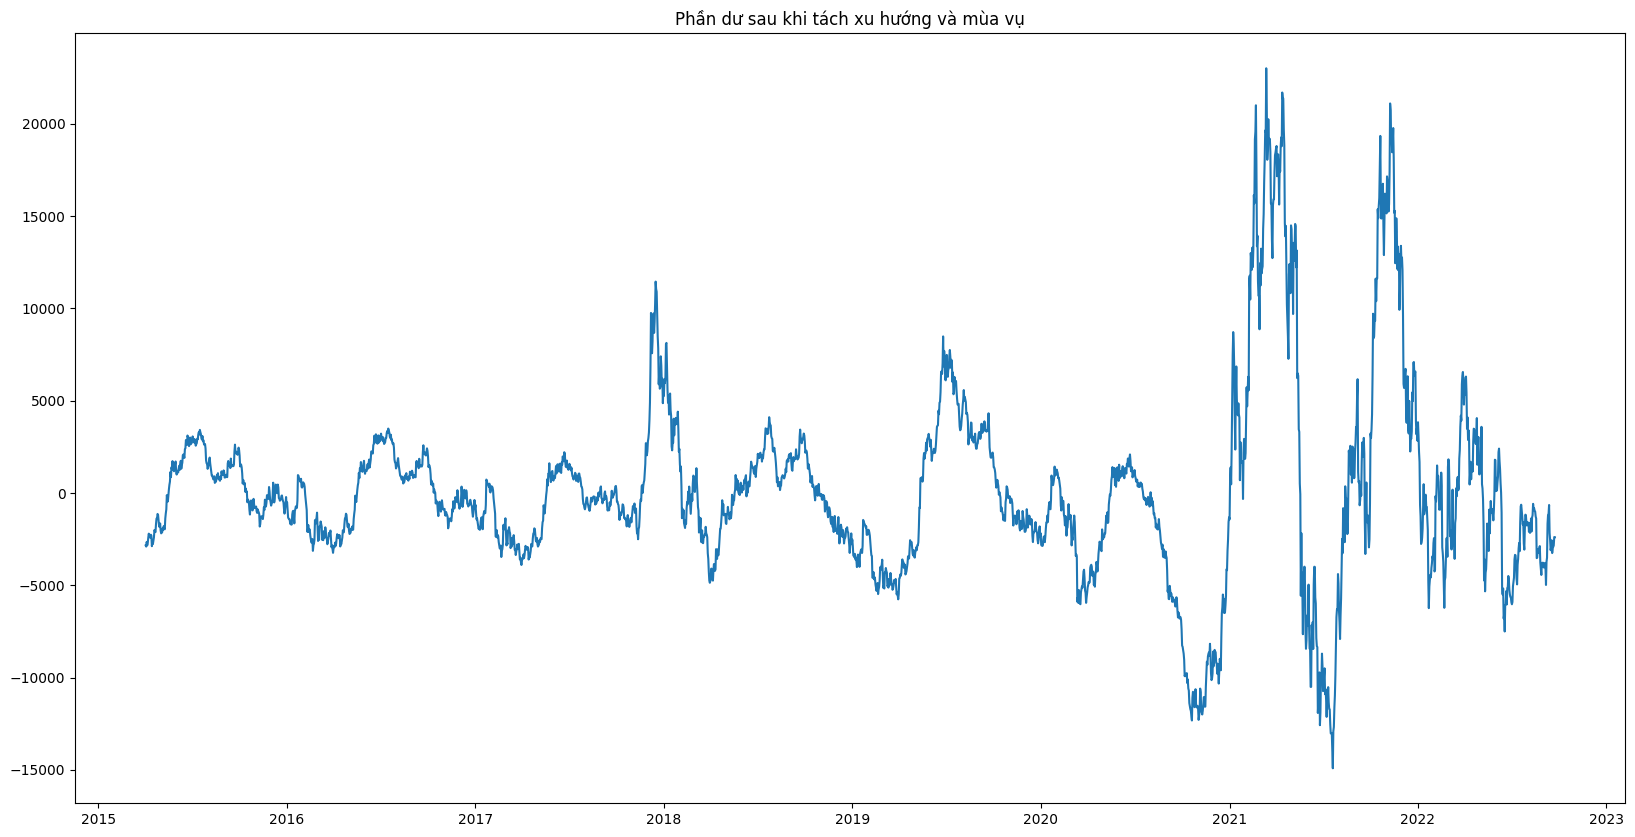

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Phần dư sau khi tách xu hướng và mùa vụ")
plt.plot(decomposed_btc_close.resid)

## Kiểm định ADF

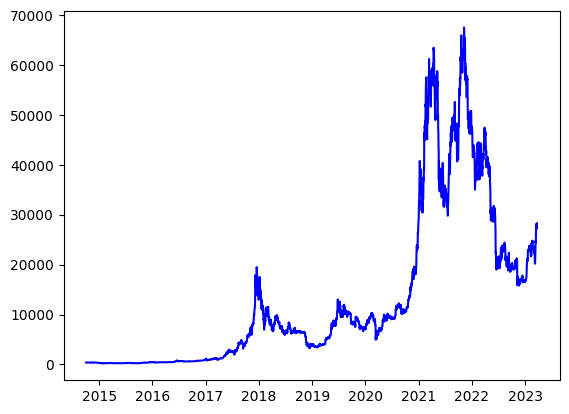

ADF Stastistic: -1.549403
p-value: 0.508947
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):

    #Plot statistics:
    orig = plt.plot(x, color='blue',label='Original')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
close_price = df['Close']      
test_stationarity(close_price)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def log_scale_and_normalize_dataset(dataset):
    # Create a copy of the dataset
    scaled_dataset = dataset.copy()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Loop over each feature column in the dataset
    for col in scaled_dataset.columns:
        # Add a small constant to the column to avoid taking the logarithm of zero or negative values
        
        col_min = scaled_dataset[col].min()
        if col_min <= 0:
            scaled_dataset[col] = scaled_dataset[col] - col_min + 1e-10
        else:
            scaled_dataset[col] = scaled_dataset[col] + 1e-10
        
        # Apply the logarithmic transformation to the column
        scaled_dataset[col] = np.log(scaled_dataset[col])

        # Scale the column using MinMaxScaler
        scaled_dataset[col] = scaler.fit_transform(scaled_dataset[col].values.reshape(-1,1))

    return scaled_dataset


In [ ]:
scaled_df = log_scale_and_normalize_dataset(df)

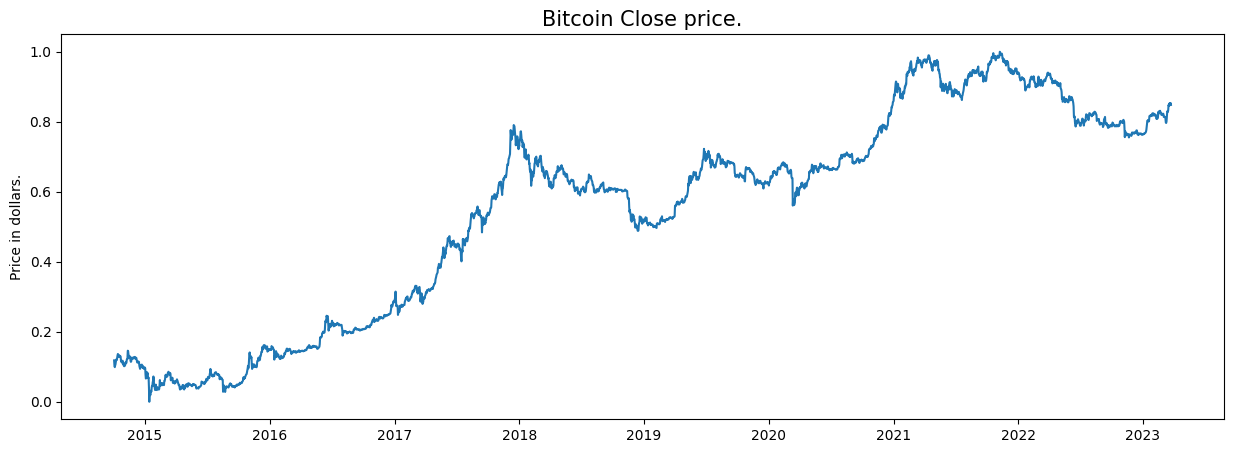

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(scaled_df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

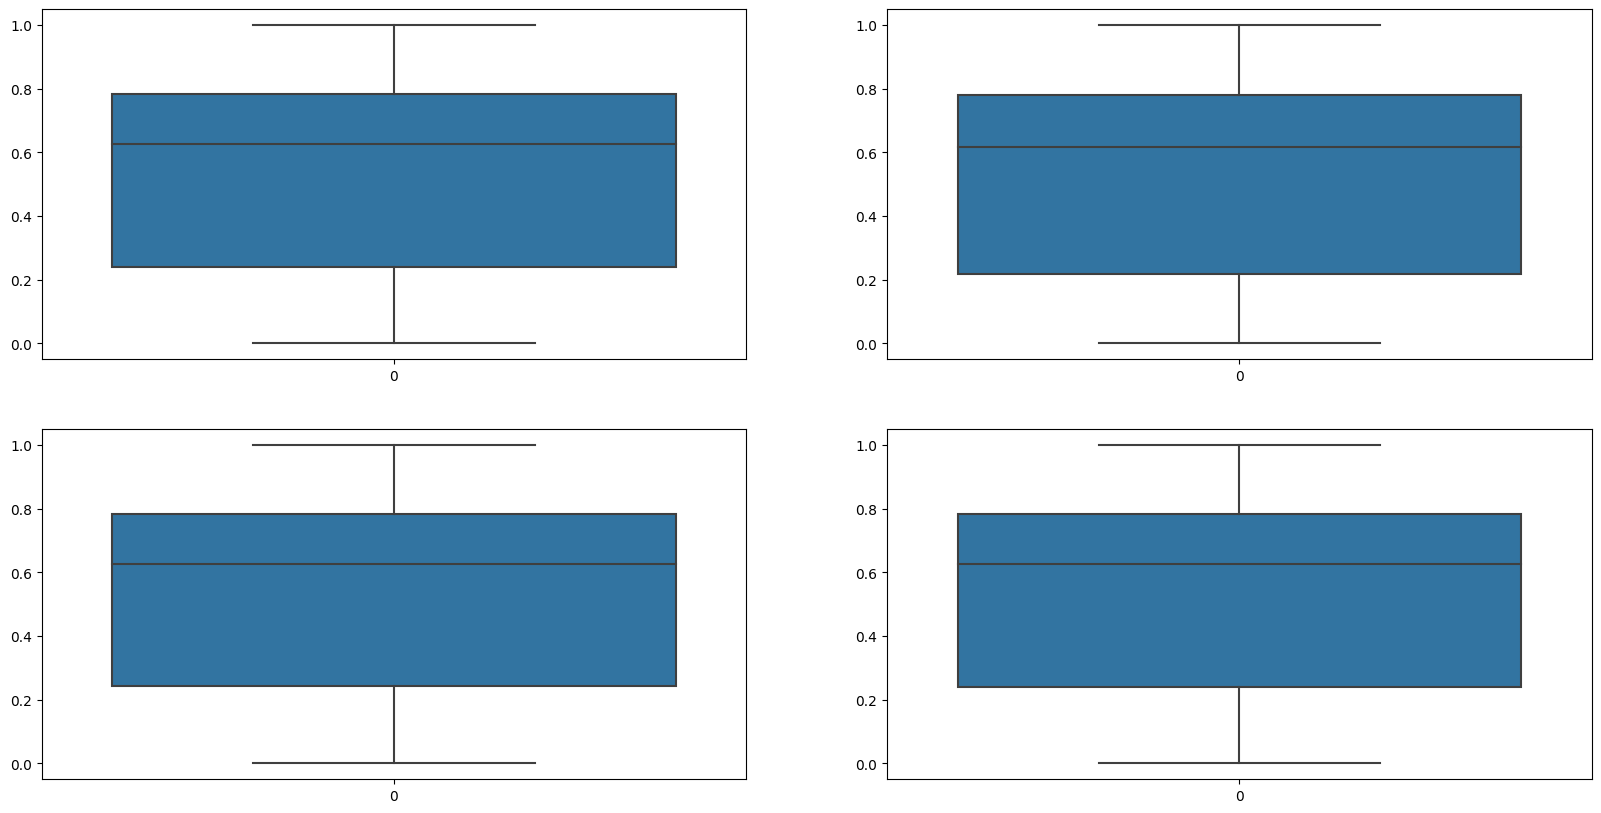

In [ ]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(scaled_df[col])
plt.show()

In [ ]:
scaled_df.to_csv("BTC_scaled.csv")

# Model training + Evaluation

## ARIMA

In [ ]:
data_ARIMA = scaled_df.copy()
close_price = data_ARIMA['Close']

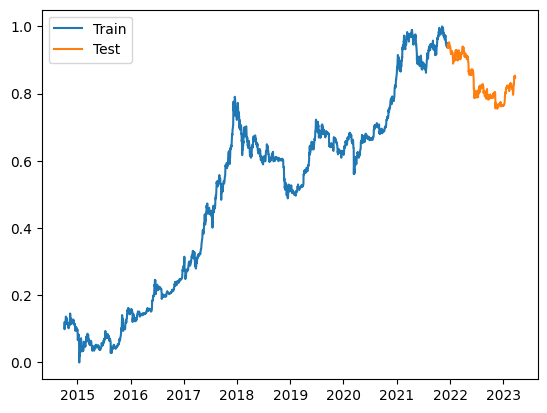

In [ ]:
to_row = int(len(close_price)*0.85)
train= list(close_price[0:to_row])
test = list(close_price[to_row:])
traino = close_price[0:to_row]

plt.plot(close_price[0:to_row],label = 'Train')
plt.plot(close_price[to_row:], label = 'Test')
plt.legend()
plt.show()

### 1.Tính các tham số

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

p-value: 0.922000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<Figure size 1000x600 with 0 Axes>

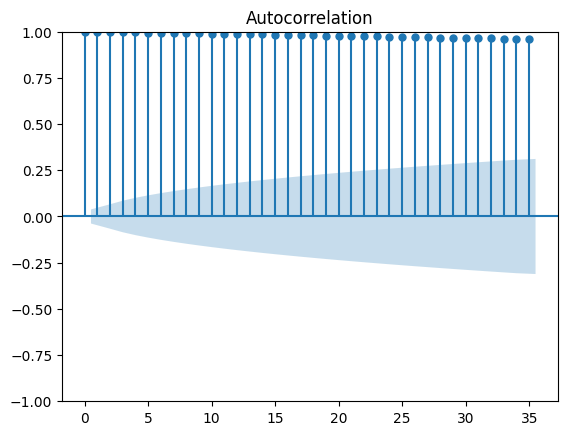

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
ax1 = plot_acf(traino)

<Figure size 800x600 with 0 Axes>

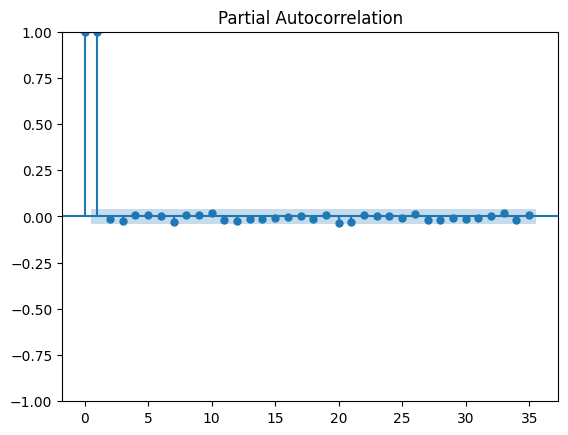

In [ ]:
plt.figure(figsize = (8, 6))
ax2 = plot_pacf(traino)

In [ ]:
step_fit = auto_arima(train, trace = True,\
                      suppress_warnings = True)
print(step_fit)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18909.769, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18917.771, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18917.281, Time=1.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18917.266, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18913.953, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18915.308, Time=1.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 8.026 seconds
 ARIMA(0,1,0)(0,0,0)[0] intercept


### 2.Xây dựng mô hình

In [ ]:
model_predictions = []
n_test_obser = len(test)

for i in range(n_test_obser):
  model = ARIMA(train, order = (0,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  actual_value = test[i]
  train.append(actual_value)

### 3.Trực quan hóa

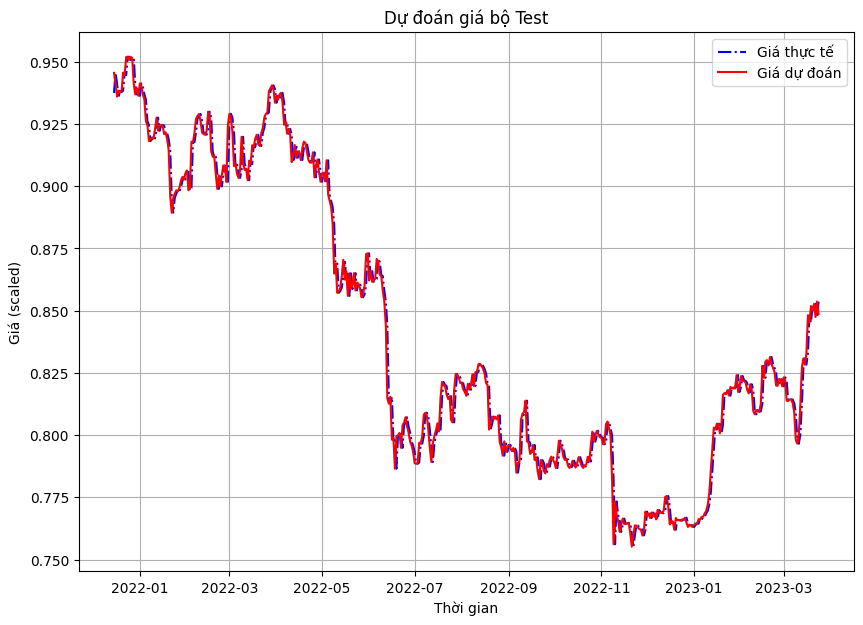

In [ ]:
plt.figure(figsize = (10,7))
plt.grid(True)

date_range = close_price[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue',\
         linestyle = 'dashdot', label = 'Giá thực tế')
plt.plot(date_range, test, color = 'red',label = 'Giá dự đoán')
plt.title('Dự đoán giá bộ Test')
plt.ylabel('Giá (scaled)')
plt.xlabel('Thời gian')
plt.legend()
plt.show()

In [ ]:
print("MSE: ",mean_squared_error(test, model_predictions))
print("R2: ",r2_score(test, model_predictions))
print("MAPE: ",mean_absolute_percentage_error(test, model_predictions))
print("RMSE: ",mean_squared_error(test, model_predictions,squared=False))

MSE:  3.051770422547035e-05
R2:  0.9910972029176749
MAPE:  0.004427980791083941
RMSE:  0.0055242831413198175


## DECISION TREE


In [ ]:
data_dt = scaled_df.copy()
data_dt.dropna()

,Open,High,Low,Close,Volume,SP500,Gold,SMA5,RSI,Stoch_k,Stoch_d
Date,,,,,,,,,,,
2014-10-03,0.126465,0.100073,0.123436,0.118276,0.150430,0.075879,0.199925,0.088140,0.478540,0.857963,0.363643
2014-10-04,0.119467,0.093918,0.107729,0.103273,0.189040,0.075879,0.199925,0.087463,0.362093,0.867583,0.173441
2014-10-05,0.104328,0.082807,0.087741,0.098939,0.240662,0.075879,0.199925,0.091165,0.332990,0.942647,0.422107
2014-10-06,0.099910,0.084485,0.095265,0.103893,0.235845,0.074254,0.218663,0.095275,0.440168,0.952324,0.582836
2014-10-07,0.105179,0.081510,0.104922,0.106981,0.192746,0.058445,0.222985,0.098432,0.494526,0.958693,0.690958
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,0.852117,0.847812,0.850528,0.850255,0.812659,0.798995,0.919004,0.851463,0.869001,0.996767,0.983101
2023-03-21,0.850470,0.847277,0.851736,0.852715,0.793073,0.812374,0.890006,0.851538,0.877114,0.998540,0.988207
2023-03-22,0.852818,0.849475,0.847527,0.847444,0.785946,0.795156,0.915689,0.850816,0.835004,0.993559,0.978308


In [ ]:
# Create rolling_window function approach
def rolling_window(data, window_size, target_column):
    X, y = [], []
    target_index = data.columns.get_loc(target_column)
    for i in range(0, len(data)-window_size-1):
        x = data.iloc[i:i+window_size, data.columns != target_column].values
        X.append(x)
        y.append(data.iloc[i+window_size, target_index])
    X = np.array(X).reshape(-1, window_size * (len(data.columns) - 1))
    y = np.array(y)
    return X, y

In [ ]:
# Create train-test splitting function for specific uses
def split_train_test(data, train_size):
    train_size = int(train_size*len(data))
    train, test = data[:train_size], data[train_size:]
    return train, test

In [ ]:
# Define regressor with default hyperparameter
dtree = DecisionTreeRegressor()

# Hyperparameter tuning
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, scoring='neg_mean_squared_error')

In [ ]:
# Choose window_size as 10 and apply rolling window approach to the X, y data
window_size = 10
X,y = rolling_window(data_dt, window_size, 'Close')

In [ ]:
# Split X, y to train and test data
X_train, X_test = split_train_test(X, 0.85)
y_train, y_test = split_train_test(y, 0.85)

In [ ]:
# Fit (train) the model and predict
fit = grid_search.fit(X_train, y_train)
predicts= fit.predict(X_test)

In [ ]:
# Get best model from grid search object
best_model = grid_search.best_estimator_

# Print best parameters
print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [ ]:
# Show how the tree choose leaf nodes in each splitting steps
print('Criterion:', best_model.criterion)

Criterion: squared_error


In [ ]:
# Evaluate predictions using MSE, RMSE, R-squared, MPE and MAPE
mse = mean_squared_error(y_test, predicts)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, predicts)
mpe = np.mean(np.abs((y_test - predicts) / y_test)) * 100

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2score)
print('MPE:', mpe)
print('MAPE:', mean_absolute_percentage_error(y_test, predicts))

MSE: 0.0004725653950273249
RMSE: 0.021738569295777607
R-squared: 0.8617707512918285
MPE: 1.82645510976099
MAPE: 0.0182645510976099


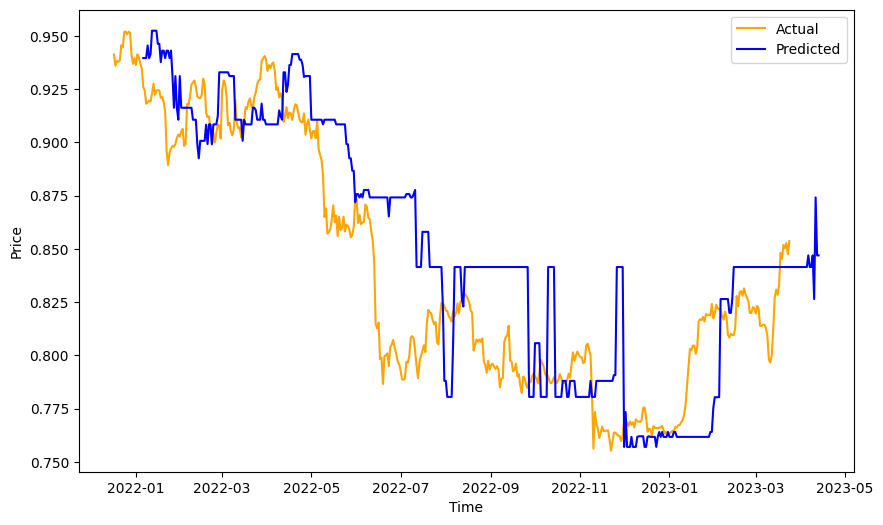

In [ ]:
# Create a separate dataframe for plotting
plot_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicts,
    'Date': data_dt.index[-len(y_test):]
})

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(plot_data['Date'], plot_data['Actual'], color='orange', label='Actual')
ax.plot(plot_data['Date'] + pd.Timedelta(days=20), plot_data['Predicted'], color='blue', label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

## LSTM


In [ ]:
data_LSTM = scaled_df.copy()

In [ ]:
def train_test_split(df, test_size):
    split_row = len(df) - int(test_size*len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(data_LSTM, test_size=0.15)

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price (processed)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

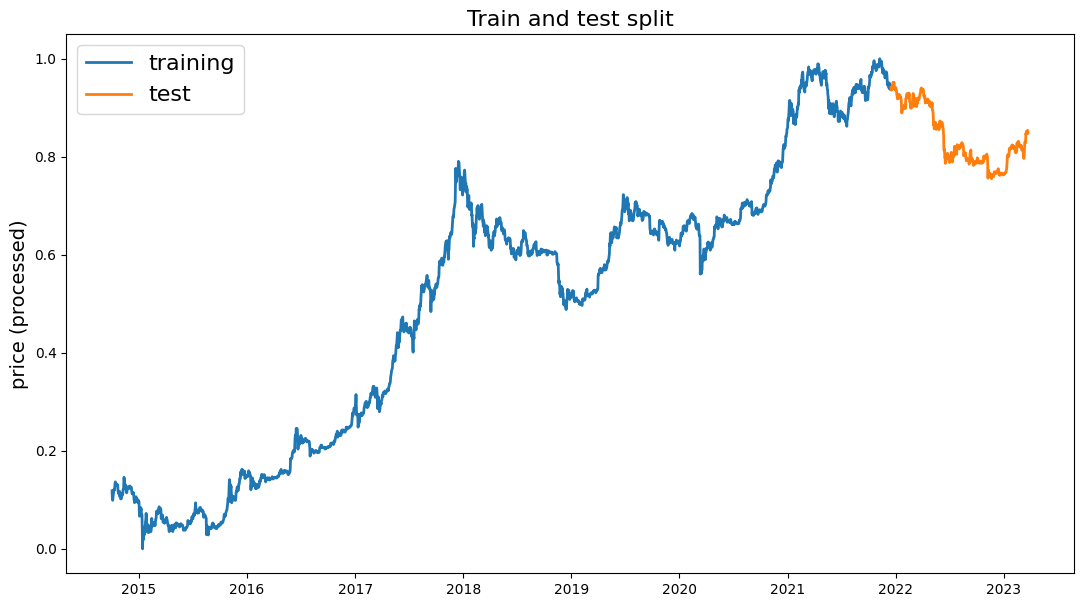

In [ ]:
target_col = 'Close'
line_plot(train[target_col], test[target_col], 'training', 'test', title='Train and test split')

In [ ]:
def extract_window_data(df, window_len):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)


In [ ]:
def prepare_data(df, target_col, window_len, test_size):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len)
    X_test = extract_window_data(test_data, window_len)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values


    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
 from keras import optimizers
def build_lstm_model(input_data, output_size, neurons, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    Adam = optimizers.Adam(lr=learning_rate)
    model.compile(loss=loss, optimizer=Adam)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.15
lstm_neurons = 100
epochs = 250
batch_size = 128
loss = 'mse'
dropout = 0.2
learning_rate=0.01

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    data_LSTM, target_col, window_len=window_len, test_size=test_size)

In [ ]:
print (train.tail())

                Open      High       Low     Close    Volume     SP500  \
Date                                                                     
2021-12-11  0.939933  0.942954  0.941847  0.947137  0.762419  0.981555   
2021-12-12  0.947212  0.947327  0.948105  0.949629  0.747756  0.981555   
2021-12-13  0.949782  0.945545  0.938060  0.937935  0.782572  0.972035   
2021-12-14  0.937947  0.939327  0.939985  0.937485  0.789308  0.964257   
2021-12-15  0.943855  0.943009  0.940878  0.945541  0.794174  0.981077   

                Gold      SMA5       RSI   Stoch_k   Stoch_d  
Date                                                          
2021-12-11  0.768973  0.946931  0.586150  0.966796  0.736470  
2021-12-12  0.768973  0.945714  0.613628  0.970684  0.770424  
2021-12-13  0.772805  0.942887  0.538076  0.948030  0.763798  
2021-12-14  0.758523  0.942968  0.535306  0.947001  0.724325  
2021-12-15  0.765040  0.943037  0.623782  0.967931  0.715848  


In [ ]:
print (test.tail())

                Open      High       Low     Close    Volume     SP500  \
Date                                                                     
2023-03-20  0.852117  0.847812  0.850528  0.850255  0.812659  0.798995   
2023-03-21  0.850470  0.847277  0.851736  0.852715  0.793073  0.812374   
2023-03-22  0.852818  0.849475  0.847527  0.847444  0.785946  0.795156   
2023-03-23  0.847620  0.849033  0.850161  0.853658  0.756756  0.798247   
2023-03-24  0.853803  0.846966  0.849269  0.848586  0.763138  0.804080   

                Gold      SMA5       RSI   Stoch_k   Stoch_d  
Date                                                          
2023-03-20  0.919004  0.851463  0.869001  0.996767  0.983101  
2023-03-21  0.890006  0.851538  0.877114  0.998540  0.988207  
2023-03-22  0.915689  0.850816  0.835004  0.993559  0.978308  
2023-03-23  0.934651  0.852071  0.859000  0.998100  0.981242  
2023-03-24  0.917430  0.849450  0.820288  0.994119  0.971658  


In [ ]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    learning_rate=learning_rate)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1, shuffle=True)

Epoch 1/250
21/21 [==============================] - 2s 27ms/step - loss: 0.0861 - val_loss: 0.0193
Epoch 2/250
21/21 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 3/250
21/21 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 4.4318e-04
Epoch 4/250
21/21 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 2.4341e-04
Epoch 5/250
21/21 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 4.2528e-04
Epoch 6/250
21/21 [==============================] - 0s 10ms/step - loss: 0.0018 - val_loss: 1.8922e-04
Epoch 7/250
21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 1.7826e-04
Epoch 8/250
21/21 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 1.9707e-04
Epoch 9/250
21/21 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 6.6986e-04
Epoch 10/250
21/21 [==============================] - 0s 9ms/step - loss

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               44800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 44,901
Trainable params: 44,901
Non-trainable params: 0
_________________________________________________________________


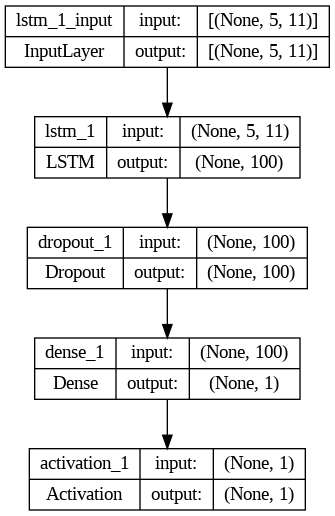

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

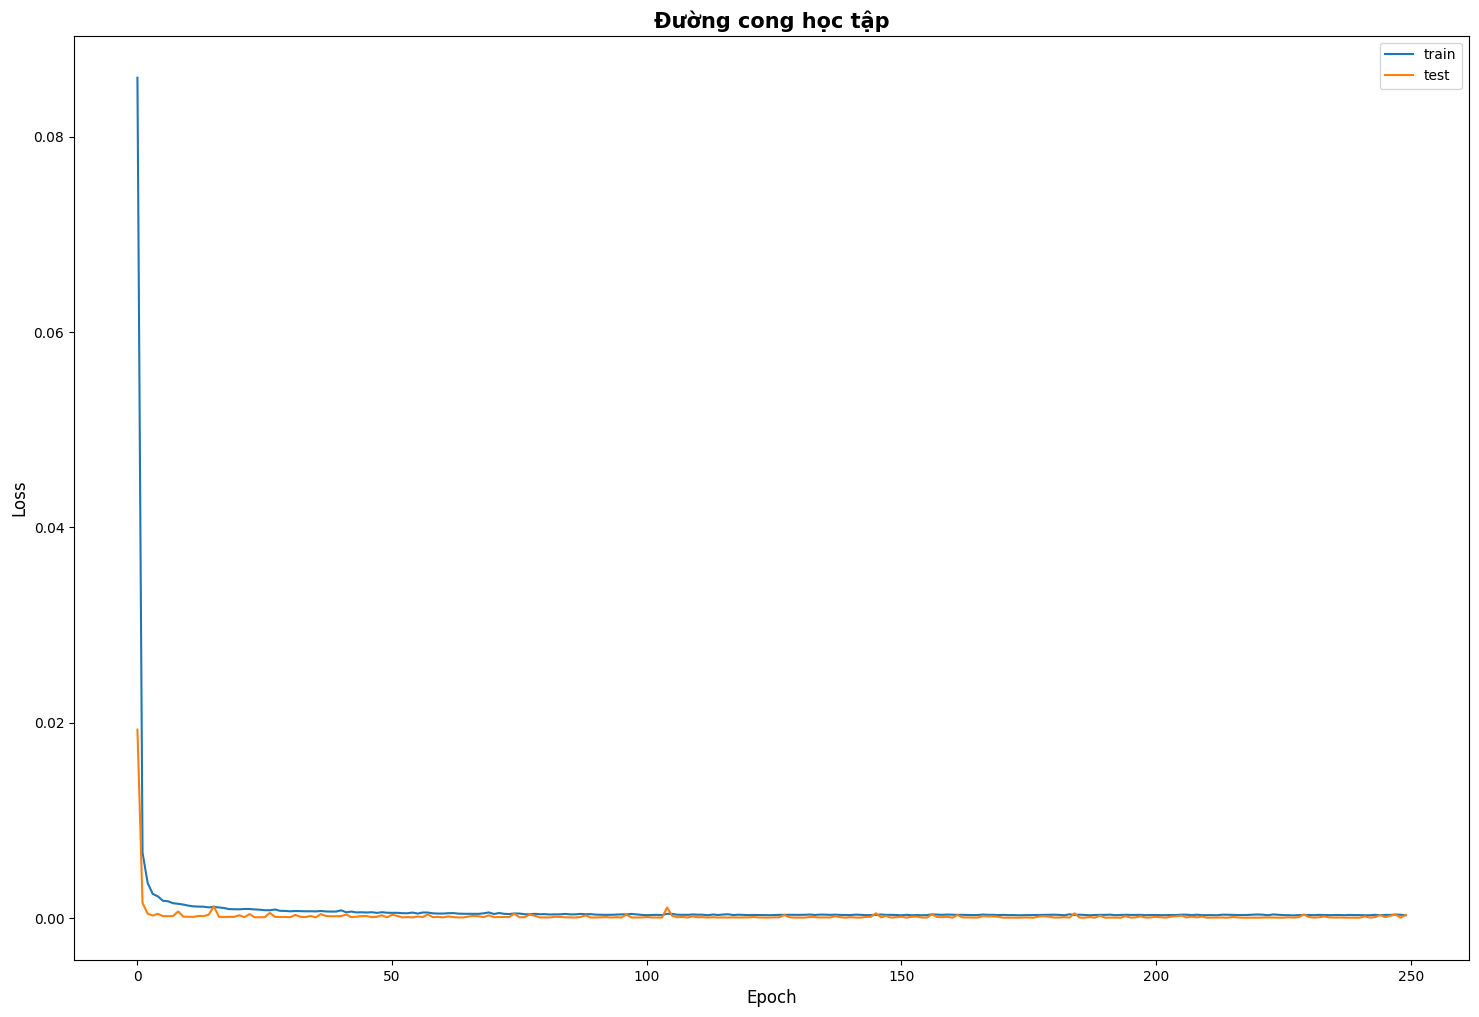

In [ ]:
loss1 = history.history['loss']
plt.figure(figsize=(18, 12))
plt.plot(loss1, label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Loss", fontsize =12)
plt.title("Đường cong học tập", fontsize=15, weight='bold')
plt.legend()
plt.show()

In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

15/15 [==============================] - 0s 2ms/step


0.007040574203855633

In [ ]:
X_test

array([[[0.94565611, 0.9428399 , 0.94393454, ..., 0.59649396,
         0.95965262, 0.73857429],
        [0.941312  , 0.9377971 , 0.93704502, ..., 0.56385176,
         0.95662864, 0.75492652],
        [0.93617084, 0.9352899 , 0.93697226, ..., 0.58962615,
         0.94126569, 0.70097768],
        [0.93846469, 0.93810216, 0.94026875, ..., 0.5862186 ,
         0.93691053, 0.65320117],
        [0.93793683, 0.93561079, 0.93690367, ..., 0.59364283,
         0.94258219, 0.61689797]],

       [[0.941312  , 0.9377971 , 0.93704502, ..., 0.56385176,
         0.95662864, 0.75492652],
        [0.93617084, 0.9352899 , 0.93697226, ..., 0.58962615,
         0.94126569, 0.70097768],
        [0.93846469, 0.93810216, 0.94026875, ..., 0.5862186 ,
         0.93691053, 0.65320117],
        [0.93793683, 0.93561079, 0.93690367, ..., 0.59364283,
         0.94258219, 0.61689797],
        [0.93858029, 0.94240326, 0.94097397, ..., 0.66943412,
         0.98153272, 0.7406055 ]],

       [[0.93617084, 0.9352899 , 0.9

In [ ]:
print (y_test.shape)
print (preds.shape)

(459,)
(459,)


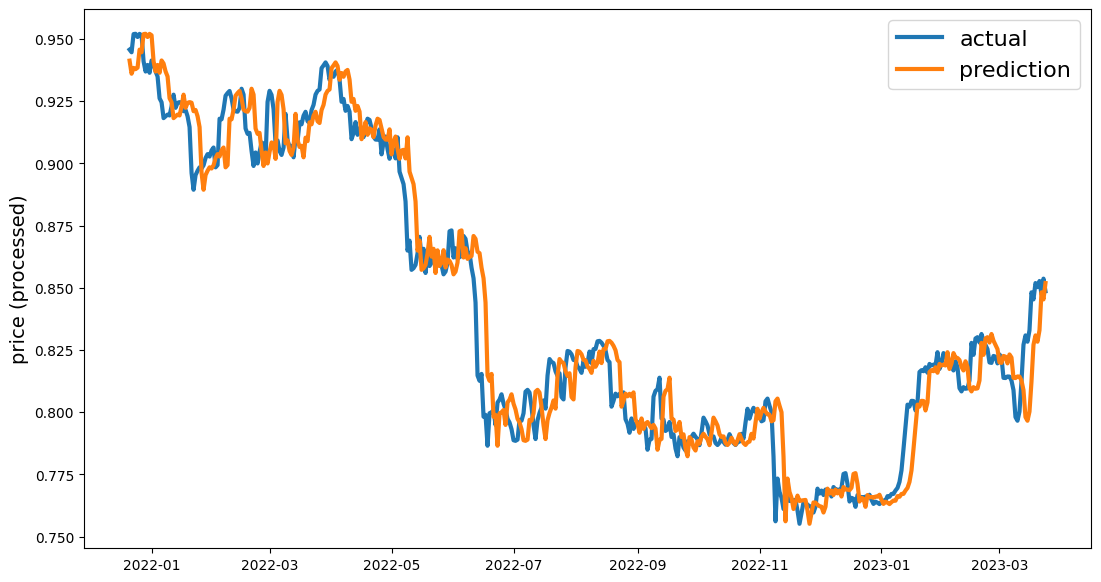

In [ ]:
preds = test[target_col].values[:-window_len]
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [ ]:
MSE = mean_squared_error (preds, y_test)
RMSE = mean_squared_error(preds, y_test, squared=False)
MAPE = mean_absolute_percentage_error (preds, y_test)
R2 =  r2_score (preds, y_test)
score_lst = [MSE, RMSE, MAPE, R2]
print ("Model evaluation (MSE, RMSE, MAPE, R-Squared)", score_lst)

Model evaluation (MSE, RMSE, MAPE, R-Squared) [0.00016963236986879888, 0.01302429920835662, 0.011051499319503659, 0.9507948613196113]
